In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('H-1B_Disclosure_Data_FY16.xlsx', converters={'NAIC_CODE':str})

In [3]:
df.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,I-200-12240-490687,CERTIFIED-WITHDRAWN,2012-08-27,2015-10-16,H-1B,2013-02-25,2016-02-24,UNIVERSITY OF MICHIGAN,"PIERPONT COMMONS, INTERNATIONAL CENTER",ANN ARBOR,...,41000.00,0.0,Year,N,N,ANN ARBOR,WASHTENAW,MI,48109,2012-08-31
1,I-200-13053-847481,CERTIFIED-WITHDRAWN,2013-02-25,2016-01-13,H-1B,2013-08-24,2016-08-23,"GOODMAN NETWORKS, INC.","6400 INTERNATIONAL PARKWAY, SUITE 1000",PLANO,...,400000.00,0.0,Year,N,N,PLANO,COLLIN,TX,75093,2013-03-01
2,I-200-13088-054259,CERTIFIED-WITHDRAWN,2013-04-23,2015-12-10,H-1B,2013-04-29,2016-04-28,"PORTS AMERICA GROUP, INC.",525 WASHINGTON BOULEVARD,JERSEY CITY,...,264000.00,451100.0,Year,N,N,JERSEY CITY,HUDSON,NJ,07310,2013-04-29
3,I-200-13144-034110,CERTIFIED-WITHDRAWN,2013-05-24,2016-01-19,H-1B,2013-10-01,2016-09-30,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",1551 WEWATTA STREET,DENVER,...,220314.00,600000.0,Year,N,N,DENVER,DENVER,CO,80202,2013-05-29
4,I-200-13172-415116,WITHDRAWN,2013-06-26,2016-05-20,H-1B,2013-10-18,2016-10-17,PEABODY INVESTMENTS CORP.,701 MARKET STREET,ST. LOUIS,...,171.63,0.0,Hour,N,N,ST. LOUIS,ST. LOUIS,MO,63101,NaT


In [4]:
df.columns

Index([u'CASE_NUMBER', u'CASE_STATUS', u'CASE_SUBMITTED', u'DECISION_DATE',
       u'VISA_CLASS', u'EMPLOYMENT_START_DATE', u'EMPLOYMENT_END_DATE',
       u'EMPLOYER_NAME', u'EMPLOYER_ADDRESS', u'EMPLOYER_CITY',
       u'EMPLOYER_STATE', u'EMPLOYER_POSTAL_CODE', u'EMPLOYER_COUNTRY',
       u'EMPLOYER_PROVINCE', u'EMPLOYER_PHONE', u'EMPLOYER_PHONE_EXT',
       u'AGENT_ATTORNEY_NAME', u'AGENT_ATTORNEY_CITY', u'AGENT_ATTORNEY_STATE',
       u'JOB_TITLE', u'SOC_CODE', u'SOC_NAME', u'NAIC_CODE', u'TOTAL_WORKERS',
       u'FULL_TIME_POSITION', u'PREVAILING_WAGE', u'PW_UNIT_OF_PAY',
       u'PW_WAGE_SOURCE', u'PW_SOURCE_YEAR', u'PW_SOURCE_OTHER',
       u'WAGE_RATE_OF_PAY_FROM', u'WAGE_RATE_OF_PAY_TO', u'WAGE_UNIT_OF_PAY',
       u'H-1B_DEPENDENT', u'WILLFUL_VIOLATOR', u'WORKSITE_CITY',
       u'WORKSITE_COUNTY', u'WORKSITE_STATE', u'WORKSITE_POSTAL_CODE',
       u'ORIGINAL_CERT_DATE'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647852 entries, 0 to 647851
Data columns (total 40 columns):
CASE_NUMBER              647852 non-null object
CASE_STATUS              647852 non-null object
CASE_SUBMITTED           647852 non-null datetime64[ns]
DECISION_DATE            647852 non-null datetime64[ns]
VISA_CLASS               647852 non-null object
EMPLOYMENT_START_DATE    647835 non-null datetime64[ns]
EMPLOYMENT_END_DATE      647827 non-null datetime64[ns]
EMPLOYER_NAME            647837 non-null object
EMPLOYER_ADDRESS         647847 non-null object
EMPLOYER_CITY            647846 non-null object
EMPLOYER_STATE           647818 non-null object
EMPLOYER_POSTAL_CODE     647831 non-null object
EMPLOYER_COUNTRY         647849 non-null object
EMPLOYER_PROVINCE        7672 non-null object
EMPLOYER_PHONE           647849 non-null object
EMPLOYER_PHONE_EXT       34262 non-null object
AGENT_ATTORNEY_NAME      647852 non-null object
AGENT_ATTORNEY_CITY      406318 non-null obj

In [6]:
df['TOTAL_WORKERS'].sum()

1313234

In [7]:
nj_emp = df[df['EMPLOYER_STATE'] == 'NJ']

In [8]:
nj_emp.describe()

/Users/epetenko/miniconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,TOTAL_WORKERS,FULL_TIME_POSITION,PREVAILING_WAGE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO
count,87718.000000,0.0,87718.000000,87715.000000,87718.000000,87718.000000
mean,1.724435,NaN,64949.707522,2015.215106,71991.097714,8899.026541
std,2.960747,NaN,20647.783752,6.825535,26144.628017,29558.289252
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,55578.000000,NaN,60000.000000,0.000000
50%,1.000000,NaN,63814.000000,NaN,68037.000000,0.000000
75%,1.000000,NaN,74006.000000,NaN,78500.000000,0.000000
max,72.000000,NaN,769600.000000,2016.000000,985000.000000,850000.000000


In [9]:
nj_emp.sum()

TOTAL_WORKERS            1.512640e+05
FULL_TIME_POSITION                NaN
PREVAILING_WAGE          5.697258e+09
PW_SOURCE_YEAR           1.767646e+08
WAGE_RATE_OF_PAY_FROM    6.314915e+09
WAGE_RATE_OF_PAY_TO      7.806048e+08
dtype: float64

In [10]:
from datetime import datetime

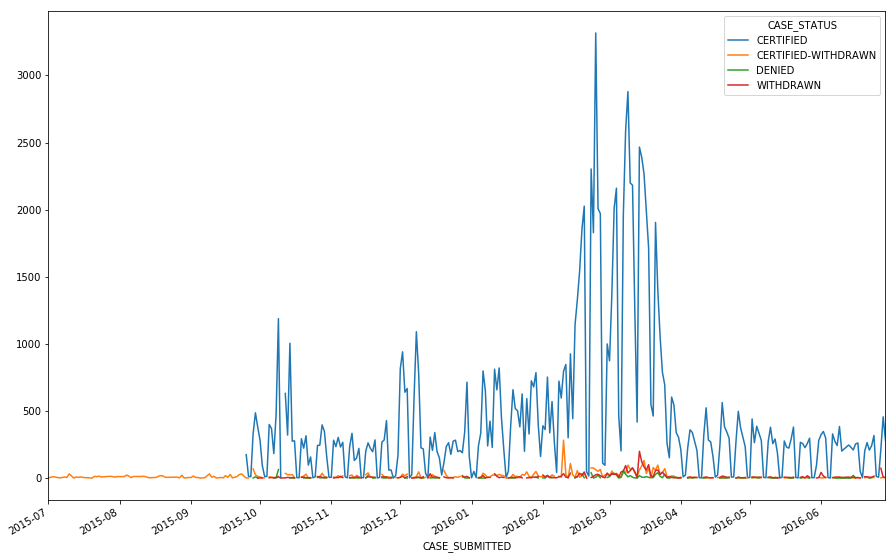

In [13]:
nj_emp[(nj_emp['CASE_SUBMITTED']>'2015-06-30')&(nj_emp['CASE_SUBMITTED']<'2016-06-30')].pivot_table(index='CASE_SUBMITTED', columns='CASE_STATUS', values='TOTAL_WORKERS', aggfunc=sum).plot(figsize=[15,10]);

In [12]:
nj_emp[(nj_emp['CASE_SUBMITTED']>'2015-09-30')&(nj_emp['CASE_SUBMITTED']<'2016-06-30')].sum()

TOTAL_WORKERS            1.316830e+05
FULL_TIME_POSITION                NaN
PREVAILING_WAGE          4.723866e+09
PW_SOURCE_YEAR           1.481284e+08
WAGE_RATE_OF_PAY_FROM    5.216495e+09
WAGE_RATE_OF_PAY_TO      6.164019e+08
dtype: float64

In [ ]:
nj_emp.groupby('CASE_STATUS').sum().iloc[:,0].sort_values(ascending=False)

In [ ]:
nj_work = df[df['WORKSITE_STATE'] == 'NJ']
nj_work[(nj_work['CASE_SUBMITTED']>'2015-06-30')&(nj_emp['CASE_SUBMITTED']<'2016-06-30')].pivot_table(index='CASE_SUBMITTED', columns='CASE_STATUS', values='TOTAL_WORKERS', aggfunc=sum).plot(figsize=[15,10]);

In [ ]:
nj_work.groupby('CASE_STATUS').sum().iloc[:,0].sort_values(ascending=False)

In [ ]:
nj_work.groupby('WORKSITE_CITY').sum().iloc[:,0].sort_values(ascending=False).head()

In [ ]:
nj_emp.groupby('SOC_NAME').sum().iloc[:,0].sort_values(ascending=False).head(10).plot(kind='barh');

In [ ]:
nj_emp.groupby('NAIC_CODE').sum().iloc[:,0].sort_values(ascending=False).head(10).plot(kind='barh');

In [ ]:
nj_emp.groupby('WILLFUL_VIOLATOR').sum().iloc[:,0].sort_values(ascending=False).head(10)

In [ ]:
nj_emp[nj_emp['WILLFUL_VIOLATOR'] == 'Y']['EMPLOYER_NAME'].nunique()